<a href="https://colab.research.google.com/github/k3vvv/Data110/blob/main/Week_4_Jupyter_and_Box_Office_Data_KevinMiele.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import matplotlib.pyplot as plt

url = "https://www.boxofficemojo.com/weekend/chart/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Use the correct class or id for the table
table = soup.find('table', {'class': 'mojo-body-table'})

data = []

if table:
    rows = table.find_all('tr')[1:]  # Assuming the first row is the header

    for row in rows:
        cells = row.find_all('td')
        if len(cells) >= 9:  # Ensure there are enough cells
            entry = {
                'rank': cells[0].text.strip(),
                'release': cells[1].text.strip(),
                'Title': cells[2].text.strip(),
                'lw': cells[3].text.strip(),
                'percentage': cells[4].text.strip(),
                'change': cells[5].text.strip(),
                'average': cells[6].text.strip(),
                'gross': cells[7].text.strip(),
                'Total Gross': cells[8].text.strip(),
                 'distributor': cells[9].text.strip() if len(cells) > 9 else ''
            }
            data.append(entry)

    if data:
        csv_file = "box_office_data.csv"
        with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
            writer = csv.DictWriter(file, fieldnames=data[0].keys())
            writer.writeheader()
            for item in data:
                writer.writerow(item)
        print(f"Data saved to {csv_file}")
    else:
        print("No data extracted from the table.")
else:
    print("Table not found in the page.")

df=pd.read_csv('/content/box_office_data.csv')
df.head()


Data saved to box_office_data.csv


,rank,release,Title,lw,percentage,change,average,gross,Total Gross,distributor
0,1,1,Bob Marley: One Love,"$13,458,354",-53%,"3,597",+58,"$3,741","$71,147,050",2
1,2,-,Demon Slayer: Kimetsu No Yaiba - To the Hashir...,"$11,500,703",-,"1,949",-,"$5,900","$11,500,703",1
2,3,-,Ordinary Angels,"$6,163,600",-,"3,020",-,"$2,040","$6,163,600",1
3,4,2,Madame Web,"$5,915,452",-61.4%,"4,013",-,"$1,474","$35,361,426",2
4,5,4,Migration,"$2,869,420",-24.9%,"2,434",-21,"$1,178","$120,315,305",10


In [9]:
# Selecting only the first 6 movies
data = df.head(6)

# Clean the 'Total Gross' column by removing '$' and ','
data['Total Gross Cleaned'] = data['Total Gross'].replace('[\$,]', '', regex=True).astype(float)

# Displaying the modified dataframe
print(data)


   rank release                                              Title  \
0     1       1                               Bob Marley: One Love   
1     2       -  Demon Slayer: Kimetsu No Yaiba - To the Hashir...   
2     3       -                                    Ordinary Angels   
3     4       2                                         Madame Web   
4     5       4                                          Migration   
5     6       3                                            Argylle   

            lw percentage change average   gross   Total Gross  distributor  \
0  $13,458,354       -53%  3,597     +58  $3,741   $71,147,050            2   
1  $11,500,703          -  1,949       -  $5,900   $11,500,703            1   
2   $6,163,600          -  3,020       -  $2,040    $6,163,600            1   
3   $5,915,452     -61.4%  4,013       -  $1,474   $35,361,426            2   
4   $2,869,420     -24.9%  2,434     -21  $1,178  $120,315,305           10   
5   $2,739,300       -44%  3,060   

<ipython-input-9-c8a61ef155e0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total Gross Cleaned'] = data['Total Gross'].replace('[\$,]', '', regex=True).astype(float)


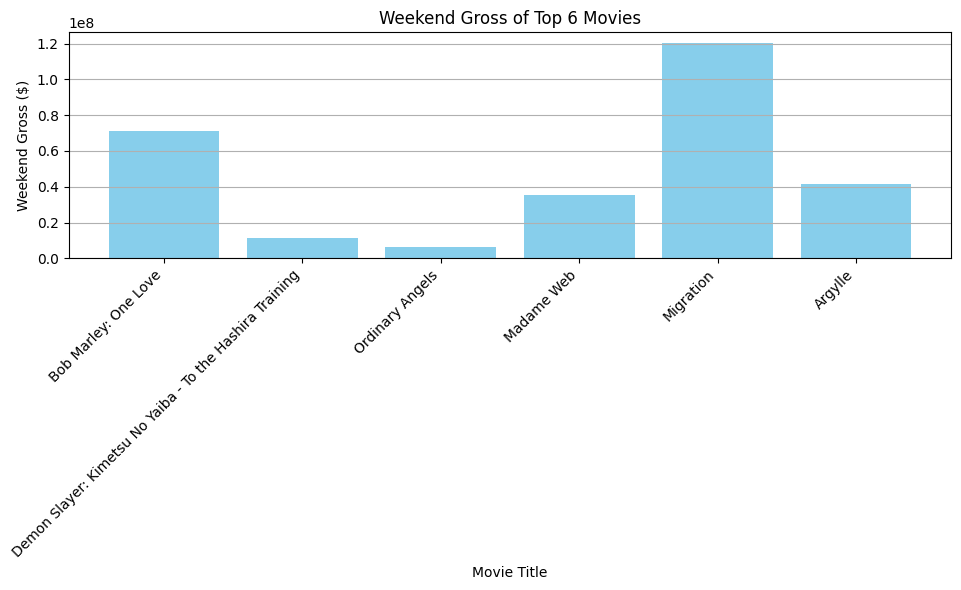

In [10]:
import matplotlib.pyplot as plt

# Plotting the bar graph
plt.figure(figsize=(10, 6))  # Adjusting the figure size
plt.bar(data['Title'], data['Total Gross Cleaned'], color='skyblue')

# Adding labels and title
plt.xlabel('Movie Title')
plt.ylabel('Weekend Gross ($)')
plt.title('Weekend Gross of Top 6 Movies')

# Rotating x-axis labels
plt.xticks(rotation=45, ha='right')

# Adding grid
plt.grid(axis='y')

# Displaying the plot
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


Some aspects of the graph that could be improved:
1. The way titles of the movies are displayed, there are other ways to make it more organized, I could have made the titles in a more horizontal position.
2. I could have decreased the font of the movie titles and expanded the bar graph more.

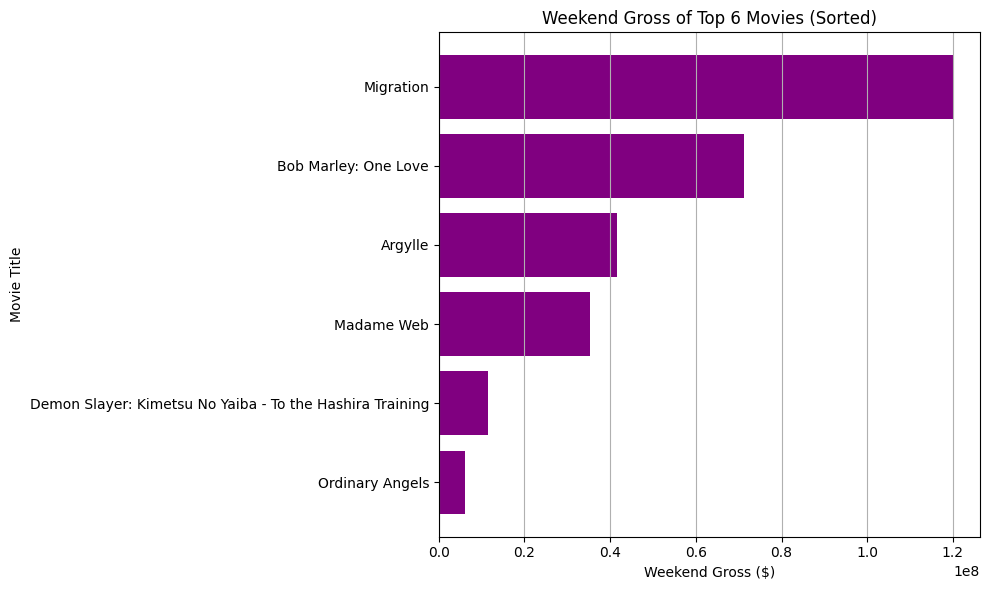

In [12]:
# Correcting the sorting method
sorted_data = data.sort_values(by='Total Gross Cleaned', ascending=True)

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))  # Adjusting the figure size for better readability
plt.barh(sorted_data['Title'], sorted_data['Total Gross Cleaned'], color='purple')

# Adding labels and title
plt.xlabel('Weekend Gross ($)')
plt.ylabel('Movie Title')
plt.title('Weekend Gross of Top 6 Movies (Sorted)')

# Adding grid for better visualization
plt.grid(axis='x')

# Displaying the plot
plt.tight_layout()
plt.show()


<ipython-input-15-bf2b765bd145>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total Gross Cleaned (Millions)'] = (data['Total Gross Cleaned'] / 1000000).astype(int)


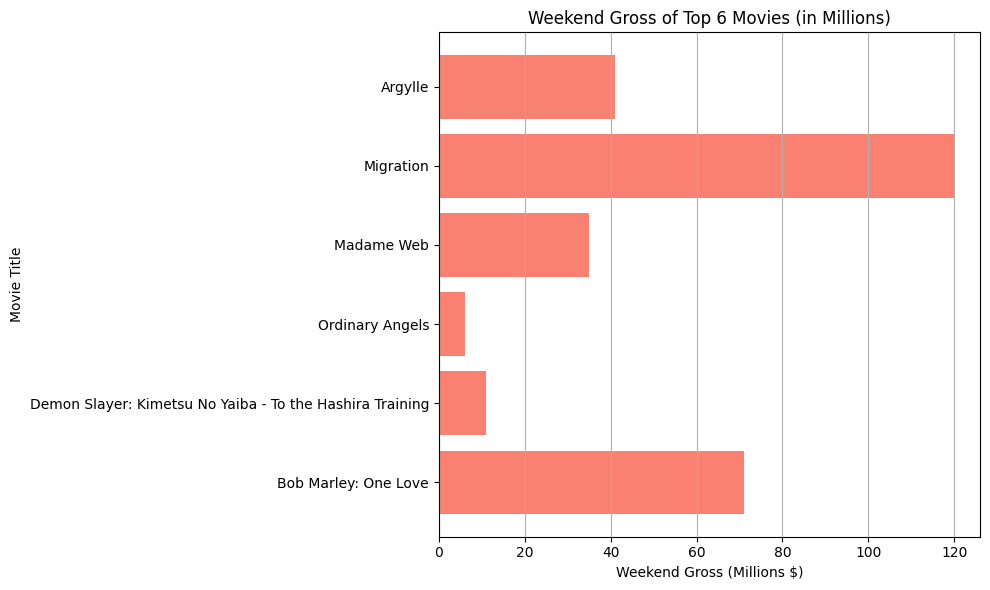

In [15]:
# Divide each entry by 1,000,000 to convert to millions
data['Total Gross Cleaned (Millions)'] = (data['Total Gross Cleaned'] / 1000000).astype(int)

# Plotting the horizontal bar chart with adjusted values
plt.figure(figsize=(10, 6))
plt.barh(data['Title'], data['Total Gross Cleaned (Millions)'], color='salmon')

# Adding labels and title
plt.xlabel('Weekend Gross (Millions $)')
plt.ylabel('Movie Title')
plt.title('Weekend Gross of Top 6 Movies (in Millions)')

# Adding grid
plt.grid(axis='x')

# Displaying the plot
plt.tight_layout()
plt.show()



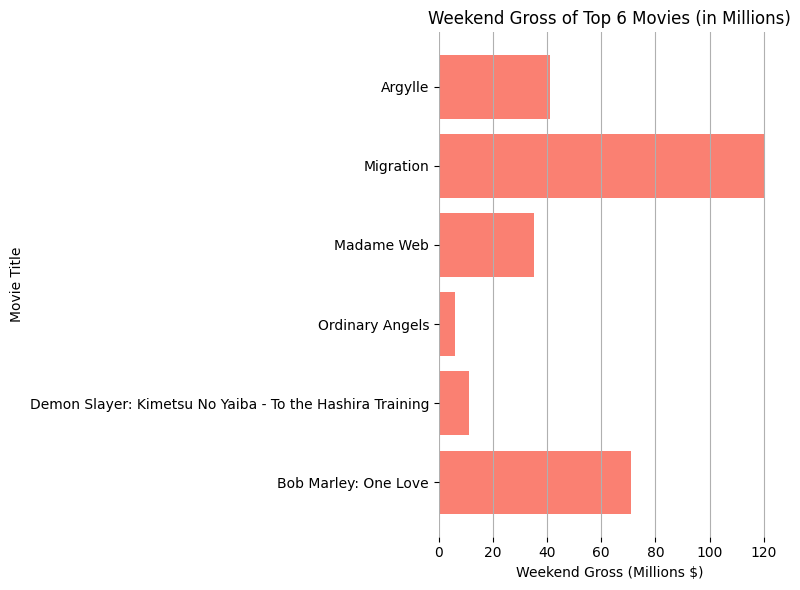

In [17]:
# Plotting the horizontal bar chart with adjusted values
plt.figure(figsize=(8, 6))
plt.barh(data['Title'], data['Total Gross Cleaned (Millions)'], color='salmon')

# Removing outer frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Adding only vertical grid lines
plt.grid(axis='x')

# Adding labels and title
plt.xlabel('Weekend Gross (Millions $)')
plt.ylabel('Movie Title')
plt.title('Weekend Gross of Top 6 Movies (in Millions)')

# Displaying the plot
plt.tight_layout()
plt.show()
